In [198]:
import numpy as np # Numerical Calculations
import pandas as pd # Data Processing
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns # Data Visualisation
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import array
# Magic function starting with % sign.Displays the 
# plot just after the line of code 
from mpl_toolkits.mplot3d import Axes3D

# Math Libraries
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull


In [199]:
%matplotlib inline

In [200]:
tr=pd.read_csv('train.csv')

In [201]:
tr.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793


In [202]:
tr = tr.rename(columns={'spacegroup' : 'sg',
                            'number_of_total_atoms' : 'Natoms',
                            'percent_atom_al' : 'x_Al',
                            'percent_atom_ga' : 'x_Ga',
                            'percent_atom_in' : 'x_In',
                            'lattice_vector_1_ang' : 'a',
                            'lattice_vector_2_ang' : 'b',
                            'lattice_vector_3_ang' : 'c',
                            'lattice_angle_alpha_degree' : 'alpha',
                            'lattice_angle_beta_degree' : 'beta',
                            'lattice_angle_gamma_degree' : 'gamma',
                            'formation_energy_ev_natom' : 'E',
                            'bandgap_energy_ev' : 'Eg'})

In [203]:
label = tr[["E", "Eg"]]

In [204]:
tr.loc[:,'x_Al':'x_In']=tr.loc[:,'x_Al':'x_In']*100

In [205]:
tr.head()

,id,sg,Natoms,x_Al,x_Ga,x_In,a,b,c,alpha,beta,gamma,E,Eg
0,1,33,80.0,62.50,37.50,0.0,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,62.50,37.50,0.0,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,81.25,18.75,0.0,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,75.00,0.00,25.0,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.00,62.50,37.5,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793


In [248]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 15 columns):
id          2400 non-null int64
sg          2400 non-null int64
Natoms      2400 non-null float64
x_Al        2400 non-null float64
x_Ga        2400 non-null float64
x_In        2400 non-null float64
a           2400 non-null float64
b           2400 non-null float64
c           2400 non-null float64
alpha       2400 non-null float64
beta        2400 non-null float64
gamma       2400 non-null float64
E           2400 non-null float64
Eg          2400 non-null float64
outliers    2400 non-null bool
dtypes: bool(1), float64(12), int64(2)
memory usage: 264.9 KB


## Data types of the attributes :

In addition to the id column there are 13 features for 2400 observations in the train data set.


In [249]:
tr.isna().sum()

id          0
sg          0
Natoms      0
x_Al        0
x_Ga        0
x_In        0
a           0
b           0
c           0
alpha       0
beta        0
gamma       0
E           0
Eg          0
outliers    0
dtype: int64

## Missing values :

In [207]:
Des=tr.describe()
Des

,id,sg,Natoms,x_Al,x_Ga,x_In,a,b,c,alpha,beta,gamma,E,Eg
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,1200.500000,141.517917,61.679167,38.543854,30.860088,30.595821,10.030005,7.086977,12.593288,90.243666,92.398971,94.787600,0.187614,2.077205
std,692.964646,84.715548,22.598337,26.556649,23.371749,26.319795,5.645457,1.890330,5.450746,1.333655,5.299734,25.868516,0.104100,1.006845
min,1.000000,12.000000,10.000000,0.000000,0.000000,0.000000,3.037000,2.942300,5.672500,82.744100,81.641300,29.727400,0.000000,0.000100
25%,600.750000,33.000000,40.000000,16.670000,9.380000,6.250000,6.141100,5.833625,9.298000,89.999700,90.000900,89.998700,0.105600,1.278500
50%,1200.500000,194.000000,80.000000,37.500000,28.120000,25.000000,9.537450,6.382950,10.125000,90.001700,90.003550,90.000400,0.181800,1.907850
75%,1800.250000,206.000000,80.000000,58.330000,46.880000,46.880000,10.292100,9.093450,14.372050,90.006200,90.014400,119.998325,0.256275,2.761950
max,2400.000000,227.000000,80.000000,100.000000,100.000000,100.000000,24.913400,10.290300,25.346000,101.229800,106.168200,120.053500,0.657200,5.286100


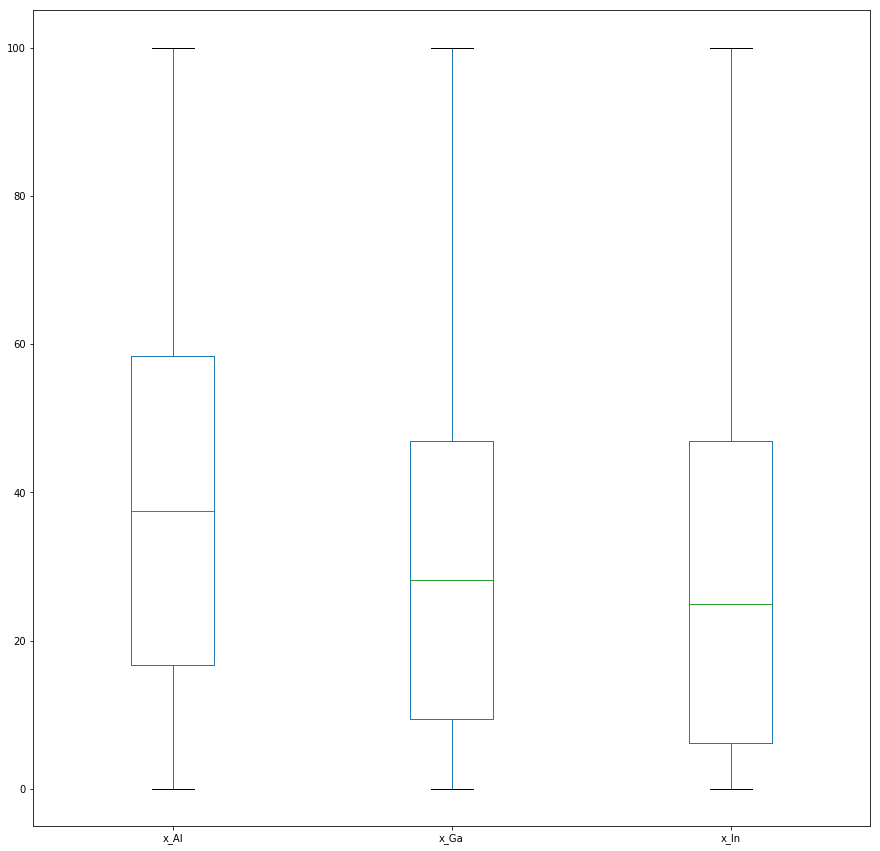

In [254]:
dataset2 = tr[["x_Al","x_Ga","x_In"]]  
dataset2.plot(kind='box',figsize=(15,15))


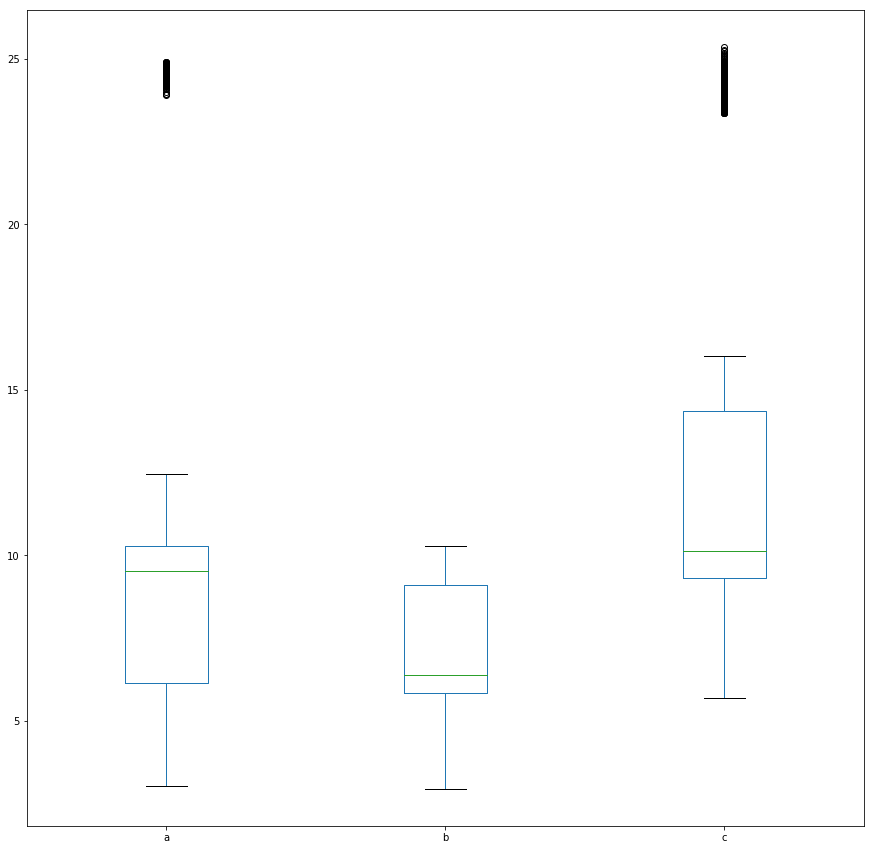

In [256]:
dataset2 = tr[["a","b","c"]]  
dataset2.plot(kind='box',figsize=(15,15))


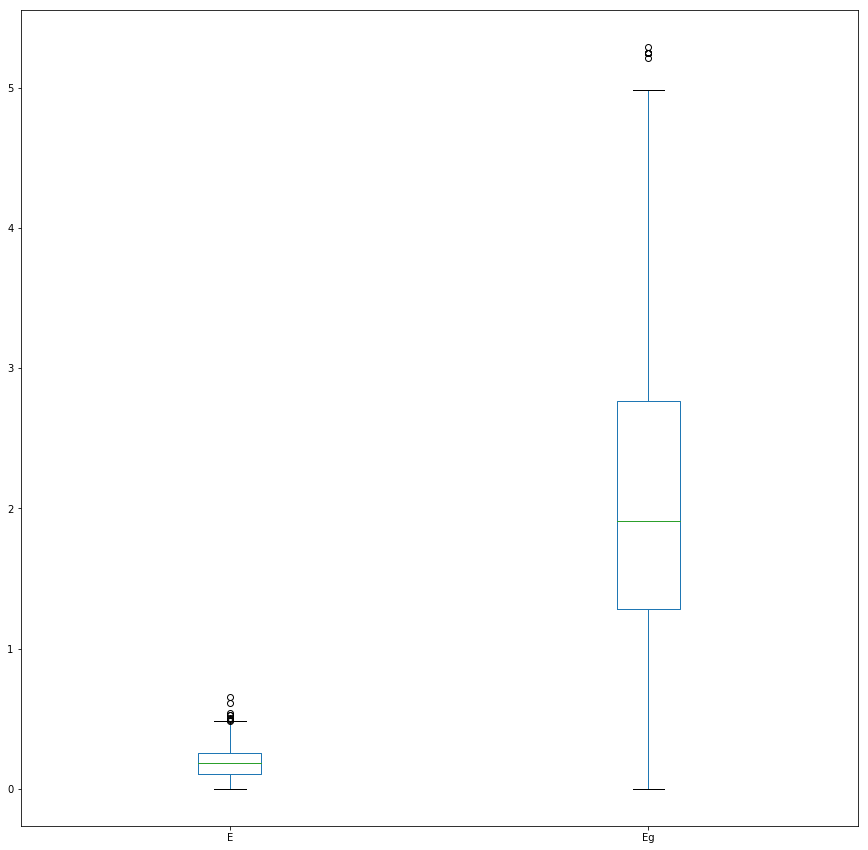

In [255]:
dataset2 = tr[["E","Eg"]]  
dataset2.plot(kind='box',figsize=(15,15))


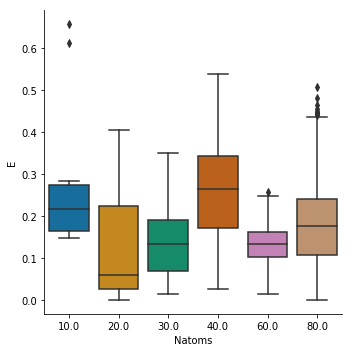

In [247]:
sns.catplot(y='E',x='Natoms',data=tr,palette="colorblind",kind="box")

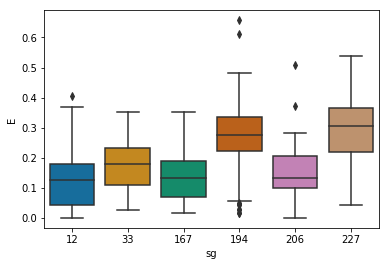

In [231]:
sns.boxplot(y='E',x='sg',data=tr,palette="colorblind")

In [209]:
IQR=Des.loc['75%','Natoms':'Eg']-\
Des.loc['25%','Natoms':'Eg']
IQR


Natoms    40.000000
x_Al      41.660000
x_Ga      37.500000
x_In      40.630000
a          4.151000
b          3.259825
c          5.074050
alpha      0.006500
beta       0.013500
gamma     29.999625
E          0.150675
Eg         1.483450
dtype: float64

In [210]:
type(tr)

pandas.core.frame.DataFrame

id        0
sg        0
Natoms    0
x_Al      0
x_Ga      0
x_In      0
a         0
b         0
c         0
alpha     0
beta      0
gamma     0
E         0
Eg        0
dtype: int64

In [213]:
tr['Natoms'].value_counts()
# Natoms attribute can be identified as discrete with six possible values


80.0    1410
40.0     519
30.0     326
20.0      84
60.0      48
10.0      13
Name: Natoms, dtype: int64

In [214]:
IQR['Eg'].round(6)

1.48345

In [215]:
tr['outliers']=(tr.Eg>(Des.loc['mean','Eg']+1.5*IQR['Eg'])) |\
(tr.Eg<(Des.loc['mean','Eg']-1.5*IQR['Eg']))

In [216]:
tr.outliers.value_counts()

False    2349
True       51
Name: outliers, dtype: int64

In [217]:
row_id=0

In [218]:
def get_xyz_data(filename, ids):
    
    A = pd.DataFrame(columns=list('ABCDE'))
    B = pd.DataFrame(columns=list('ABCE'))
    
    with open(filename) as f:
        for line in f.readlines():
            x = line.split()
            if x[0] == 'atom':

                newrowA = pd.DataFrame([[x[1],x[2],x[3],x[4],ids]], columns=list('ABCDE'))
                A = A.append(newrowA)
                
            elif x[0] == 'lattice_vector':
                
                newrowB = pd.DataFrame([[x[1],x[2],x[3],ids]], columns=list('ABCE'))
                B = B.append(newrowB)

    return A, B

In [219]:
def pca(index):
    fn = "train/{}/geometry.xyz".format(index)
    train_xyz, train_lat = get_xyz_data(fn, index)
    matrix = train_xyz
    colour = matrix["D"]
    matrix = matrix[["A","B","C"]].as_matrix()
    matrix = matrix.astype(float)
    pca = PCA(n_components=3)
    X_r = pca.fit(matrix).transform(matrix)
    df_ = pd.DataFrame(np.round(X_r,2))
        
    x = np.array(matrix[:,0])
    y = np.array(matrix[:,1])
    z = np.array(matrix[:,2])
    hull = ConvexHull(X_r[:,[0,1]])
    volume_1 = hull.volume
    hull = ConvexHull(X_r[:,[0,2]])
    volume_2 = hull.volume
    hull = ConvexHull(X_r[:,[1,2]])
    volume_3 = hull.volume
    #print("On the first principle component are approx. " + str(len(df_[0].unique())) + " distinct coordinates with atoms")
    #print("On the second principle component are approx. " + str(len(df_[1].unique())) + " distinct coordinates with atoms")
    #print("On the third principle component are approx. " + str(len(df_[2].unique())) + " distinct coordinates with atoms")
    #print("")
    #print("Area covered by the first and second principal component: " + str(volume_1))
    #print("Area covered by the first and third principal component: " + str(volume_2))
    #print("Area covered by the second and third principal component: " + str(volume_3))
    return volume_1,volume_2,volume_3
    

In [168]:
ans2=[]

for i in range(2400):
    ans2.append(pca(index=i+1))


/home/rahul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [235]:
ans2[307]

(94.80814676908108, 85.09595734473001, 83.48613586732148)

In [238]:
ans2[2399]

(92.94972686700297, 84.02147066936055, 80.37333964902821)

In [239]:
def geo(index):
    fn = "train/{}/geometry.xyz".format(index)
    train_xyz, train_lat = get_xyz_data(fn, index)
    print(train_xyz)
    
    
   
        
 

In [240]:
tr[tr.duplicated(['sg','Natoms','x_Al','x_Ga','x_In','a','b','c','alpha','beta','gamma'])].head()

,id,sg,Natoms,x_Al,x_Ga,x_In,a,b,c,alpha,beta,gamma,E,Eg,outliers
50,51,167,30.0,41.67,33.33,25.00,5.0862,5.0858,13.6981,89.9942,90.0065,120.0010,0.1608,2.5143,False
58,59,167,30.0,50.00,50.00,0.00,4.9360,4.9356,13.3762,89.9923,90.0089,120.0009,0.0617,3.7029,False
77,78,12,80.0,0.00,40.62,59.38,24.7650,6.5014,6.4860,90.0003,105.2410,90.0000,0.0824,1.1499,False
97,98,12,20.0,37.50,62.50,0.00,12.2659,3.0312,5.8004,89.9997,103.7911,90.0002,0.0406,2.7322,False
116,117,194,80.0,34.38,31.25,34.38,6.5261,6.5257,24.2821,90.0123,90.0054,119.9935,0.4020,1.1281,False


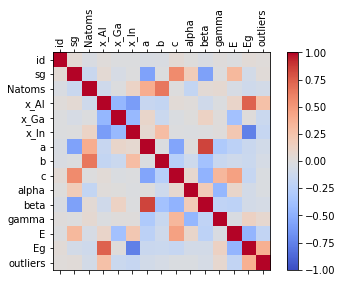

In [221]:
corr = tr.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(tr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(tr.columns)
ax.set_yticklabels(tr.columns)
plt.show()

In [223]:
# function to visualize data using scatter plots

def plot_scatter(x, y, xlabel, ylabel):
    """
    Args:
        x (str) - DataFrame column for x-axis
        y (str) - DataFrame column for y-axis
        xlabel (str) - name for x-axis
        ylabel (str) - name for y-axis
    Returns:
        matplotlib scatter plot of y vs x
    """
    s = 75
    lw = 0
    alpha = 0.05
    color = 'blue'
    marker = 'o'
    axis_width = 1.5
    maj_tick_len = 6
    fontsize = 16
    label = '__nolegend__'
    ax = plt.scatter(tr[x].values, tr[y].values,
                     marker=marker, color=color, s=s, 
                     lw=lw, alpha=alpha, label=label)
    xrange = abs(tr[x].max() - tr[x].min())
    yrange = abs(tr[y].max() - tr[y].min())
    cushion = 0.1
    xmin = tr[x].min() - cushion*xrange
    xmax = tr[x].max() + cushion*xrange
    ymin = tr[y].min() - cushion*yrange
    ymax = tr[y].max() + cushion*yrange
    ax = plt.xlim([xmin, xmax])
    ax = plt.ylim([ymin, ymax])
    ax = plt.xlabel(xlabel, fontsize=fontsize)
    ax = plt.ylabel(ylabel, fontsize=fontsize)
    ax = plt.xticks(fontsize=fontsize)
    ax = plt.yticks(fontsize=fontsize)
    ax = plt.tick_params('both', length=maj_tick_len, width=axis_width, 
                         which='major', right=True, top=True)
    return ax

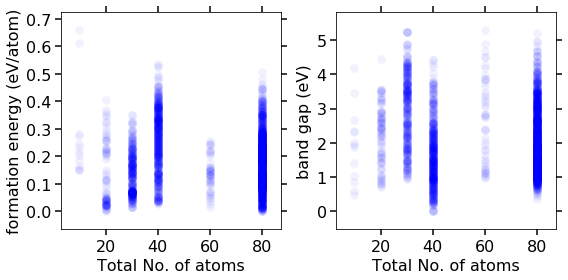

In [234]:
# visualize the relationship between our target properties and the volume

fig1 = plt.figure(1, figsize=(8, 4))
ax1 = plt.subplot(121)
ax1 = plot_scatter('Natoms', 'E', 
                   'Total No. of atoms', 'formation energy (eV/atom)')
ax2 = plt.subplot(122)
ax2 = plot_scatter('Natoms', 'Eg', 
                   'Total No. of atoms', 'band gap (eV)')
plt.tight_layout()
plt.show()
plt.close()

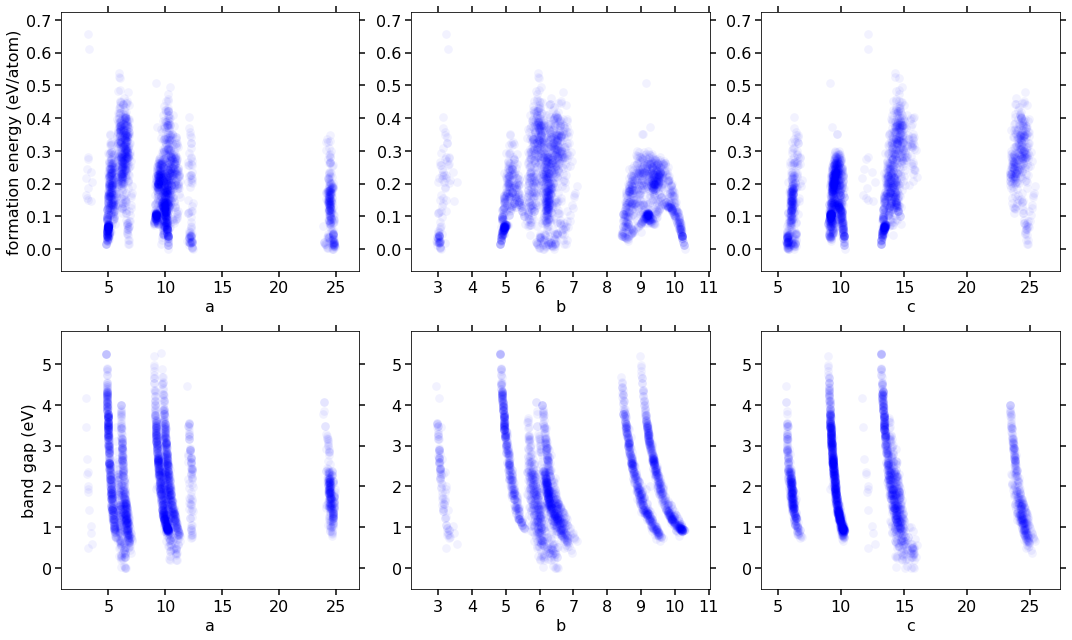

In [225]:
# visualize the relationship between our target properties and the volume

fig1 = plt.figure(1, figsize=(15, 9))
ax1 = plt.subplot(231)
ax1 = plot_scatter('a', 'E', 
                   'a', 'formation energy (eV/atom)')
ax2 = plt.subplot(232)
ax2 = plot_scatter('b', 'E', 
                   'b', '')
ax3 = plt.subplot(233)
ax3 = plot_scatter('c', 'E', 
                   'c', '')
ax4 = plt.subplot(234)
ax4 = plot_scatter('a', 'Eg', 
                   'a', 'band gap (eV)')
ax5 = plt.subplot(235)
ax5 = plot_scatter('b', 'Eg', 
                   'b', '')
ax6 = plt.subplot(236)
ax6 = plot_scatter('c', 'Eg', 
                   'c', '')


plt.tight_layout()
plt.show()
plt.close()

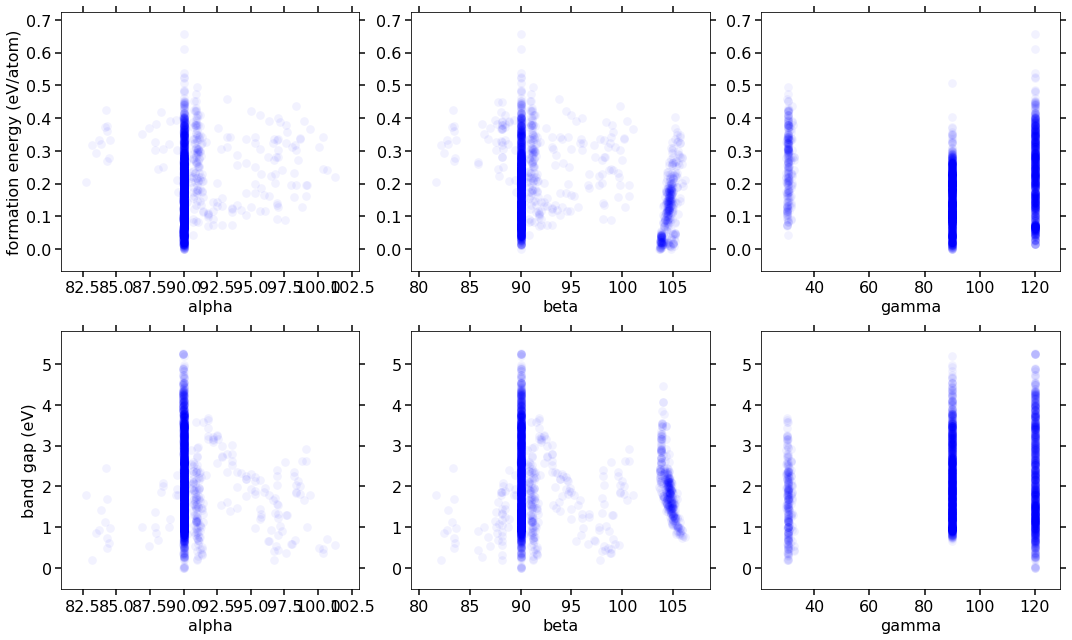

In [226]:
# visualize the relationship between our target properties and the volume

fig1 = plt.figure(1, figsize=(15, 9))
ax1 = plt.subplot(231)
ax1 = plot_scatter('alpha', 'E', 
                   'alpha', 'formation energy (eV/atom)')
ax2 = plt.subplot(232)
ax2 = plot_scatter('beta', 'E', 
                   'beta', '')
ax3 = plt.subplot(233)
ax3 = plot_scatter('gamma', 'E', 
                   'gamma', '')
ax4 = plt.subplot(234)
ax4 = plot_scatter('alpha', 'Eg', 
                   'alpha', 'band gap (eV)')
ax5 = plt.subplot(235)
ax5 = plot_scatter('beta', 'Eg', 
                   'beta', '')
ax6 = plt.subplot(236)
ax6 = plot_scatter('gamma', 'Eg', 
                   'gamma', '')


plt.tight_layout()
plt.show()
plt.close()

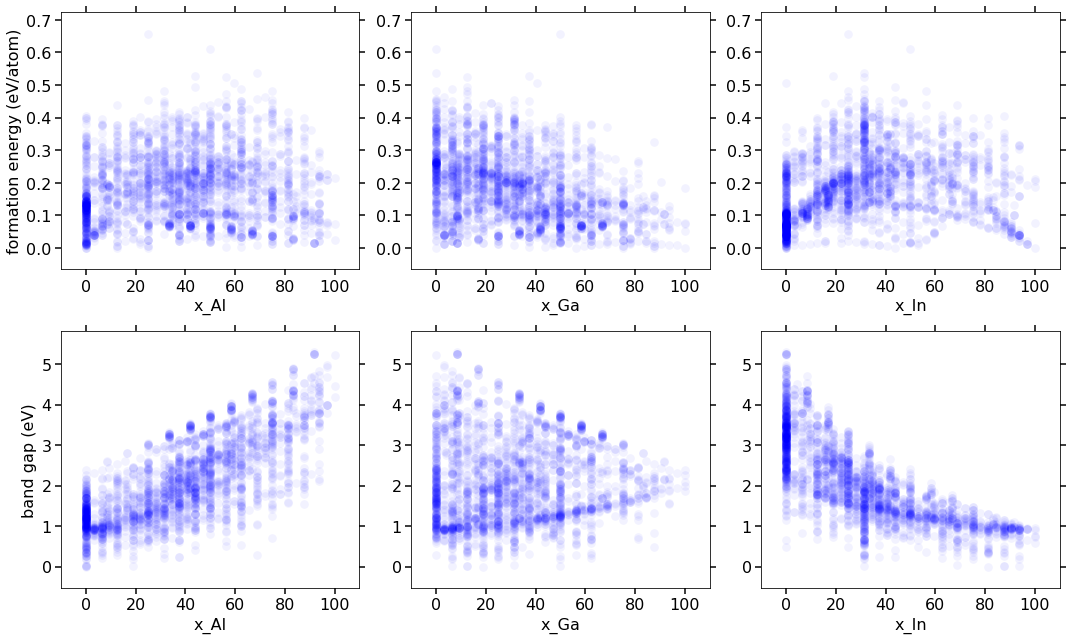

In [227]:
# visualize the relationship between our target properties and the volume

fig1 = plt.figure(1, figsize=(15, 9))
ax1 = plt.subplot(231)
ax1 = plot_scatter('x_Al', 'E', 
                   'x_Al', 'formation energy (eV/atom)')
ax2 = plt.subplot(232)
ax2 = plot_scatter('x_Ga', 'E', 
                   'x_Ga', '')
ax3 = plt.subplot(233)
ax3 = plot_scatter('x_In', 'E', 
                   'x_In', '')
ax4 = plt.subplot(234)
ax4 = plot_scatter('x_Al', 'Eg', 
                   'x_Al', 'band gap (eV)')
ax5 = plt.subplot(235)
ax5 = plot_scatter('x_Ga', 'Eg', 
                   'x_Ga', '')
ax6 = plt.subplot(236)
ax6 = plot_scatter('x_In', 'Eg', 
                   'x_In', '')


plt.tight_layout()
plt.show()
plt.close()

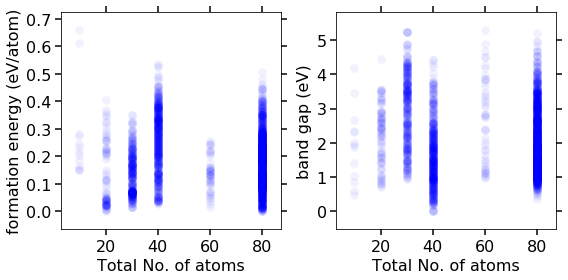

In [228]:
# visualize the relationship between our target properties and the volume

fig1 = plt.figure(1, figsize=(8, 4))
ax1 = plt.subplot(121)
ax1 = plot_scatter('Natoms', 'E', 
                   'Total No. of atoms', 'formation energy (eV/atom)')
ax2 = plt.subplot(122)
ax2 = plot_scatter('Natoms', 'Eg', 
                   'Total No. of atoms', 'band gap (eV)')
plt.tight_layout()
plt.show()
plt.close()

In [96]:
# calculate the volume of the structure

def get_vol(a, b, c, alpha, beta, gamma):
    """
    Args:
        a (float) - lattice vector 1
        b (float) - lattice vector 2
        c (float) - lattice vector 3
        alpha (float) - lattice angle 1 [radians]
        beta (float) - lattice angle 2 [radians]
        gamma (float) - lattice angle 3 [radians]
    Returns:
        volume (float) of the parallelepiped unit cell
    """
    return a*b*c*np.sqrt(1 + 2*np.cos(alpha)*np.cos(beta)*np.cos(gamma)
                           - np.cos(alpha)**2
                           - np.cos(beta)**2
                           - np.cos(gamma)**2)

# convert lattice angles from degrees to radians for volume calculation
lattice_angles = ['alpha', 'beta', 'gamma']
for lang in lattice_angles:
    tr['_'.join([lang, 'r'])] = np.pi * tr[lang] / 180
    # compute the cell volumes 
tr['vol'] = get_vol(tr['a'], tr['b'], tr['c'],
                          tr['alpha_r'], tr['beta_r'], tr['gamma_r'])
tr[['a','b','c','alpha_r','beta_r','gamma_r','vol']].head()
    

,a,b,c,alpha_r,beta_r,gamma_r,vol
0,9.9523,8.5513,9.1775,1.570842,1.570836,1.570826,781.052081
1,6.1840,6.1838,23.6287,1.571121,1.570761,2.094439,782.500110
2,9.7510,5.6595,13.9630,1.587705,1.590393,0.532648,391.227531
3,5.0036,5.0034,13.5318,1.570601,1.571004,2.094425,293.377334
4,6.6614,6.6612,24.5813,1.570727,1.570807,2.094208,944.713843


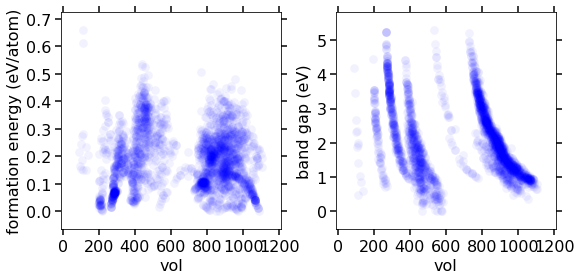

In [97]:
# visualize the relationship between our target properties and the volume

fig1 = plt.figure(1, figsize=(8, 4))
ax1 = plt.subplot(121)
ax1 = plot_scatter('vol', 'E', 
                   'vol', 'formation energy (eV/atom)')
ax2 = plt.subplot(122)
ax2 = plot_scatter('vol', 'Eg', 
                   'vol', 'band gap (eV)')
plt.tight_layout()
plt.show()
plt.close()

In [98]:
# calculate the atomic density

# this is known to correlate with stability or bonding strength
tr['atomic_density'] = tr['Natoms'] / tr['vol']   

tr[['a','b','c','alpha','beta','gamma','vol', 'Natoms', 'atomic_density']].head()

,a,b,c,alpha,beta,gamma,vol,Natoms,atomic_density
0,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,781.052081,80.0,0.102426
1,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,782.500110,80.0,0.102236
2,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,391.227531,40.0,0.102242
3,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,293.377334,30.0,0.102257
4,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,944.713843,80.0,0.084682


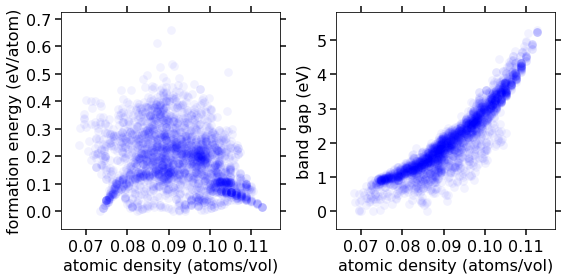

In [99]:
# visualize the relationship between our target properties and the atomic density

fig1 = plt.figure(1, figsize=(8, 4))
ax1 = plt.subplot(121)
ax1 = plot_scatter('atomic_density', 'E', 
                   'atomic density (atoms/vol)', 'formation energy (eV/atom)')
ax2 = plt.subplot(122)
ax2 = plot_scatter('atomic_density', 'Eg', 
                   'atomic density (atoms/vol)', 'band gap (eV)')
plt.tight_layout()
plt.show()
plt.close()

In [115]:
# use random forests to quantify the importances of each feature

# list of columns not to be used for training
non_features = ['id', 'E', 'Eg',
               'alpha_r', 'beta_r', 'gamma_r']

# list of columns to be used for training each model
features = [col for col in list(tr) if col not in non_features]
print('%i features: %s' % (len(features), features))

# make feature matrix
X = tr[features].values

# make target columns for each target property
y_E = tr['E'].values
y_Eg = tr['Eg'].values

# split into training and test for the purposes of this demonstration
test_size = 0.2
rstate = 42
X_train_E, X_test_E, y_train_E, y_test_E = train_test_split(X, y_E, 
                                                            test_size=test_size,
                                                            random_state=rstate)
X_train_Eg, X_test_Eg, y_train_Eg, y_test_Eg = train_test_split(X, y_Eg, 
                                                                test_size=test_size, 
                                                                random_state=rstate)

# number of base decision tree estimators
n_est = 100
# maximum depth of any given decision tree estimator
max_depth = 5
# random state variable
rstate = 42
# initialize a random forest algorithm
rf_E = RandomForestRegressor(n_estimators=n_est, 
                             max_depth=max_depth,
                             random_state=rstate)
rf_Eg = RandomForestRegressor(n_estimators=n_est, 
                             max_depth=max_depth,
                             random_state=rstate)
# fit to training data
rf_E.fit(X_train_E, y_train_E)
rf_Eg.fit(X_train_Eg, y_train_Eg)

14 features: ['sg', 'Natoms', 'x_Al', 'x_Ga', 'x_In', 'a', 'b', 'c', 'alpha', 'beta', 'gamma', 'outliers', 'vol', 'atomic_density']


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [117]:
#report the most important featuers for predicting each target

# collect ranking of most "important" features for E
importances_E =  rf_E.feature_importances_
descending_indices_E = np.argsort(importances_E)[::-1]
sorted_importances_E = [importances_E[idx] for idx in descending_indices_E]
sorted_features_E = [features[idx] for idx in descending_indices_E]
print('most important feature for formation energy is %s' % sorted_features_E[0])

# collect ranking of most "important" features for Eg
importances_Eg =  rf_Eg.feature_importances_
descending_indices_Eg = np.argsort(importances_Eg)[::-1]
sorted_importances_Eg = [importances_Eg[idx] for idx in descending_indices_Eg]
sorted_features_Eg = [features[idx] for idx in descending_indices_Eg]
print('most important feature for band gap is %s' % sorted_features_Eg[0])

most important feature for formation energy is c
most important feature for band gap is atomic_density
